# Subreddit Classifier Project: Monty Python vs. Python Language
## Stage 2: Preprocessing

Now that I have collected data from the Python and MontyPython subreddits, I will perform some preprocessing on the data to cleanse it, use some transformation techniques so that I have a good selection of features to input into my models in the next steps. 

For preprocessing, I will use a variety of natural language processing tools to cleanse and transform my corpus in preparation for modeling. I will start by tokenizing the corpus so I can look at word counts both in total and unique. I will also lemmatize the tokens to remove different conjugations and variations of the same word. I will also look at the most common words to determine whether stop_words should be removed. Once my corpus has been cleansed and explored, and I have created new features using NLP techniques, I will be ready for stage 3, which is model building. 

#### Imports

In [86]:
# Standard imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP imports:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# Estimator and Tranformer imports:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Other useful imports:
import sys
import time

In [87]:
ls

README.md         code/             images/
Requirements.txt  data/             presentation/


In [191]:
all_py = pd.read_csv('./data/all_py.csv', index_col=0)

In [192]:
all_py.head()

,id,subreddit,title,selftext,title_selftext,subred
0,kk4x0j,Python,Question About Django Models,"okay, here is the situation what do I do?\n\nI...","Question About Django Models okay, here is the...",1
1,kk4n1m,Python,I'm very new to Python and need help coding a ...,NaN,I'm very new to Python and need help coding a ...,1
2,kk4b4f,Python,How to define a complex number in polar form i...,NaN,How to define a complex number in polar form i...,1
3,kk41hq,Python,Negative binomial distribution issue,[removed],Negative binomial distribution issue [removed],1
4,kk3u6a,Python,Merry Christmas Everyone. I suck at making art...,NaN,Merry Christmas Everyone. I suck at making art...,1


In [193]:
all_py.tail()

,id,subreddit,title,selftext,title_selftext,subred
2995,efsdtx,montypython,Look what I got for Christmas!,NaN,Look what I got for Christmas!,0
2996,efqm57,montypython,I noticed something about the can of whip crea...,NaN,I noticed something about the can of whip crea...,0
2997,efnc5r,montypython,Omegle Girls Teen - Wildest Teen Omegle Girls ...,NaN,Omegle Girls Teen - Wildest Teen Omegle Girls ...,0
2998,efn84i,montypython,Sorry if someone else has done this,NaN,Sorry if someone else has done this,0
2999,efn3kd,montypython,Low effort meme I made,NaN,Low effort meme I made,0


#### Explore the data with NLP

In [194]:
tokenizer = RegexpTokenizer(r'\w+')

In [195]:
all_py['tokens'] = all_py['title_selftext'].apply(tokenizer.tokenize)

In [196]:
all_py.head()

,id,subreddit,title,selftext,title_selftext,subred,tokens
0,kk4x0j,Python,Question About Django Models,"okay, here is the situation what do I do?\n\nI...","Question About Django Models okay, here is the...",1,"[Question, About, Django, Models, okay, here, ..."
1,kk4n1m,Python,I'm very new to Python and need help coding a ...,NaN,I'm very new to Python and need help coding a ...,1,"[I, m, very, new, to, Python, and, need, help,..."
2,kk4b4f,Python,How to define a complex number in polar form i...,NaN,How to define a complex number in polar form i...,1,"[How, to, define, a, complex, number, in, pola..."
3,kk41hq,Python,Negative binomial distribution issue,[removed],Negative binomial distribution issue [removed],1,"[Negative, binomial, distribution, issue, remo..."
4,kk3u6a,Python,Merry Christmas Everyone. I suck at making art...,NaN,Merry Christmas Everyone. I suck at making art...,1,"[Merry, Christmas, Everyone, I, suck, at, maki..."


In [197]:
# Credit for the code in the next two cells goes to a site Emily shared by a gentleman named Emmanuel:
# https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

all_words = [word for tokens in all_py['tokens'] for word in tokens]
vocab = sorted(list(set(all_words)))

print(f'Total words in posts: {len(all_words)}')
print(f'Total unique words in posts: {len(vocab)}')

Total words in posts: 100995
Total unique words in posts: 12808


In [199]:
all_py['post_length'] = [len(tokens) for tokens in all_py['tokens']]
post_length = [len(tokens) for tokens in all_py['tokens']]

print(f'Avg Post Length: {np.mean(post_length).round(1)}')
print(f'Min Post Length: {np.min(post_length).round(1)}')
print(f'Max Post Length: {np.max(post_length).round(1)}')

In [200]:
all_py.head()

,id,subreddit,title,selftext,title_selftext,subred,tokens,post_length
0,kk4x0j,Python,Question About Django Models,"okay, here is the situation what do I do?\n\nI...","Question About Django Models okay, here is the...",1,"[Question, About, Django, Models, okay, here, ...",85
1,kk4n1m,Python,I'm very new to Python and need help coding a ...,NaN,I'm very new to Python and need help coding a ...,1,"[I, m, very, new, to, Python, and, need, help,...",41
2,kk4b4f,Python,How to define a complex number in polar form i...,NaN,How to define a complex number in polar form i...,1,"[How, to, define, a, complex, number, in, pola...",11
3,kk41hq,Python,Negative binomial distribution issue,[removed],Negative binomial distribution issue [removed],1,"[Negative, binomial, distribution, issue, remo...",5
4,kk3u6a,Python,Merry Christmas Everyone. I suck at making art...,NaN,Merry Christmas Everyone. I suck at making art...,1,"[Merry, Christmas, Everyone, I, suck, at, maki...",15


In [201]:
# Based on the below, post_length could be predictive in differentiating Python and monty python posts. 
# Depending on the model, I may pull this in as a feature. 

all_py.groupby('subreddit').mean()

,subred,post_length
subreddit,,
Python,1.0,49.604667
montypython,0.0,17.725333


In [202]:
# I'm going to create two columns to use as the main feature in my model.
# One is the mostly unaltered title_selftext as it currently exists at this point.
# The second will be this column with special characters removed and the words lemmatized.

In [203]:
# Instantiate lemmatizer:
stemmer = WordNetLemmatizer()

# Instanciate Porter Stemmer:
p_stemmer = PorterStemmer()

In [204]:
# Despite the Python subreddit focusing on a programming language, very few posts in my sample appear to contain actual code. 
# Based on this, I am going to remove special characters and punctuation from my datasets, then stem them in a couple different ways. 
# Specific RegExp codes and for loop used below were from this article:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/

X = all_py['title_selftext']

title_selftext_lem = []
title_selftext_stem = []

for sen in range(0, len(X)):
    corpus = re.sub(r'\W', ' ', str(X[sen]))                        # Remove all the special characters
    corpus = re.sub(r'\s+[a-zA-Z]\s+', ' ', corpus)                 # remove all single characters
    corpus = re.sub(r'\^[a-zA-Z]\s+', ' ', corpus)                  # Remove single characters from the start
    corpus = re.sub(r'\s+', ' ', corpus, flags=re.I)                # Substituting multiple spaces with single space
    corpus = corpus.lower()                                         # Converting to Lowercase
    corpus = corpus.split()                                         # Lemmatization
    corpus_lem = [stemmer.lemmatize(word) for word in corpus]
    corpus_stem = [p_stemmer.stem(word) for word in corpus]         # Porter Stemming
    corpus_lem = ' '.join(corpus_lem)                               # Join tokens back together
    corpus_stem = ' '.join(corpus_stem)
    title_selftext_lem.append(corpus_lem)                           # Append tokens to lists to be added as columns to df
    title_selftext_stem.append(corpus_stem)

In [205]:
# Add Lemmatized and P-Stemmed tokens to data frame:

all_py['title_selftext_lem'] = title_selftext_lem
all_py['title_selftext_stem'] = title_selftext_stem

In [206]:
all_py.head()

,id,subreddit,title,selftext,title_selftext,subred,tokens,post_length,title_selftext_lem,title_selftext_stem
0,kk4x0j,Python,Question About Django Models,"okay, here is the situation what do I do?\n\nI...","Question About Django Models okay, here is the...",1,"[Question, About, Django, Models, okay, here, ...",85,question about django model okay here is the s...,question about django model okay here is the s...
1,kk4n1m,Python,I'm very new to Python and need help coding a ...,NaN,I'm very new to Python and need help coding a ...,1,"[I, m, very, new, to, Python, and, need, help,...",41,i very new to python and need help coding calc...,i veri new to python and need help code calcul...
2,kk4b4f,Python,How to define a complex number in polar form i...,NaN,How to define a complex number in polar form i...,1,"[How, to, define, a, complex, number, in, pola...",11,how to define complex number in polar form in ...,how to defin complex number in polar form in p...
3,kk41hq,Python,Negative binomial distribution issue,[removed],Negative binomial distribution issue [removed],1,"[Negative, binomial, distribution, issue, remo...",5,negative binomial distribution issue removed,neg binomi distribut issu remov
4,kk3u6a,Python,Merry Christmas Everyone. I suck at making art...,NaN,Merry Christmas Everyone. I suck at making art...,1,"[Merry, Christmas, Everyone, I, suck, at, maki...",15,merry christmas everyone suck at making art so...,merri christma everyon suck at make art so enj...


In [207]:
# Checking for nulls, since I've removed all single characters.
all_py.isnull().sum()

id                        0
subreddit                 0
title                     0
selftext               1653
title_selftext            0
subred                    0
tokens                    0
post_length               0
title_selftext_lem        0
title_selftext_stem       0
dtype: int64

In [208]:
# Even though there are no nulls, we could still have blank values. Checking for that:
all_py[all_py['title_selftext_lem'] == '']

,id,subreddit,title,selftext,title_selftext,subred,tokens,post_length,title_selftext_lem,title_selftext_stem
1553,kduohn,montypython,🤼‍♂️💨,NaN,🤼‍♂️💨,0,[],0,,
2870,eskp0x,montypython,💙💙,NaN,💙💙,0,[],0,,


In [209]:
all_py[all_py['title_selftext_stem'] == '']

,id,subreddit,title,selftext,title_selftext,subred,tokens,post_length,title_selftext_lem,title_selftext_stem
1553,kduohn,montypython,🤼‍♂️💨,NaN,🤼‍♂️💨,0,[],0,,
2870,eskp0x,montypython,💙💙,NaN,💙💙,0,[],0,,


In [210]:
all_py[all_py['post_length'] == 0]

,id,subreddit,title,selftext,title_selftext,subred,tokens,post_length,title_selftext_lem,title_selftext_stem
1553,kduohn,montypython,🤼‍♂️💨,NaN,🤼‍♂️💨,0,[],0,,
2870,eskp0x,montypython,💙💙,NaN,💙💙,0,[],0,,


In [211]:
# Dropping these two rows from dataset:
all_py = all_py[all_py['post_length'] != 0]

In [212]:
all_py.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2998 non-null   object
 1   subreddit            2998 non-null   object
 2   title                2998 non-null   object
 3   selftext             1347 non-null   object
 4   title_selftext       2998 non-null   object
 5   subred               2998 non-null   int64 
 6   tokens               2998 non-null   object
 7   post_length          2998 non-null   int64 
 8   title_selftext_lem   2998 non-null   object
 9   title_selftext_stem  2998 non-null   object
dtypes: int64(2), object(8)
memory usage: 257.6+ KB


#### Use CountVectorizer to Explore Corpus

In [155]:
# First I will explore the title_selftext column (no lemmatization):

X = all_py['title_selftext'].tolist()
y = all_py['subred']

# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

print(f'X_train size: {sys.getsizeof(X_train)}')
print(f'X_test size: {sys.getsizeof(X_test)}')
print(f'y_train size: {sys.getsizeof(y_train)}')
print(f'y_test size: {sys.getsizeof(y_test)}')

X_train size: 16552
X_test size: 7976
y_train size: 32144
y_test size: 15856


In [156]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

# Fit the training corpus:
cvec.fit(X_train, y_train)

CountVectorizer()

In [157]:
# Transform the training & testing corpora:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [158]:
# Based on the shape of our X_train & X_test, our rows split 66.7% to training and 33.3% to test as expected.
# CountVectorizer split the title_selftext field into 8,086 rows, meaning there were that many unique words in the dataset.
print(X_train.shape)
print(X_test.shape)

(2008, 8214)
(990, 8214)


In [225]:
# Creating custom list of stopwords that include all 'english' plus my own added:
# Method found on StackOverflow https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list/24386751:

from sklearn.feature_extraction import text 
my_added_words = ['python', 'https', 'removed', 'http']
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_added_words)

In [216]:
X = all_py['title_selftext'].tolist()
y = all_py['subred']

# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

In [217]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=my_stop_words)

# Fit the training corpus:
cvec.fit(X_train, y_train)

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [218]:
# Transform the training & testing corpora:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [219]:
# With Stopwords removed, CountVectorizer split the title_selftext field into rows.
print(X_train.shape)
print(X_test.shape)

(2008, 7942)
(990, 7942)


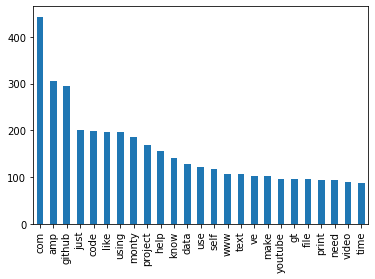

In [220]:
# Look at barchart of 25 most common words exclusing 'english' stopwords and my custom adds:

# Turn X_train into dataframe:
X_train_df = pd.DataFrame(X_train.todense(),
                         columns = cvec.get_feature_names())

# Graph top occuring words:
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='bar');

In [43]:
X_train_df.head()

,00,000,01,0206,04,065fae5e4546269edbacce0966bc5d668af1a116,06fe079183ee3713f2212f6e7efec90e830bc92d,07,08,09,...,для,игры,лучшие,мини,онлайн,процесс,сountry,странный,パイソン,モンティ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Now I will explore the title_selftext_lem column:

X = all_py['title_selftext_lem'].tolist()
y = all_py['subred']

# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

print(f'X_train size: {sys.getsizeof(X_train)}')
print(f'X_test size: {sys.getsizeof(X_test)}')
print(f'y_train size: {sys.getsizeof(y_train)}')
print(f'y_test size: {sys.getsizeof(y_test)}')

X_train size: 16552
X_test size: 7976
y_train size: 32144
y_test size: 15856


In [100]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

# Fit the training corpus:
cvec.fit(X_train, y_train)

CountVectorizer()

In [101]:
# Transform the training & testing corpora:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [102]:
# With lemmatization, the total number of unique columns/words has dropped from 8,086 to 7,410.

print(X_train.shape)
print(X_test.shape)

(2008, 7410)
(990, 7410)


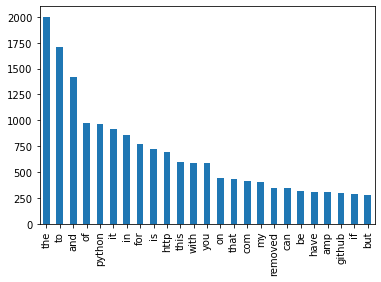

In [103]:
# Look at barchart of 25 most common words

# Turn X_train into dataframe:
X_train_df = pd.DataFrame(X_train.todense(),
                         columns = cvec.get_feature_names())

# Graph top occuring words:
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='bar');

In [104]:
# Now remove stopwords and look at most common:
X = all_py['title_selftext_lem'].tolist()
y = all_py['subred']

# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

In [105]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words=my_stop_words)

# Fit the training corpus:
cvec.fit(X_train, y_train)

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [106]:
# Transform the training & testing corpora:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [108]:
# With Stopwords removed, CountVectorizer split the title_selftext_lem field into 7,140.
# This is down from 7,812 rows without lemmatization.
print(X_train.shape)
print(X_test.shape)

(2008, 7140)
(990, 7140)


### NLP Visualizations
#### Top Words by Post
Previously I looked at common words across the full datset. But looking at the differences between Python and Monty Python will highlight how well our word variety between the subreddits will influence the predictive power of the models. 

In [287]:
# Most common words in each Subreddit:

# Removing a few words that are common, but don't have to do with the subreddits specifically:
custom_words = ['https', 'removed', 'http', 'amp', 'www']
new_stop_words = text.ENGLISH_STOP_WORDS.union(custom_words)

# Split the df for ease of analysis:
pypro = all_py[all_py['subred'] == 1]
monty = all_py[all_py['subred'] == 0]

# CountVectorize Python data:
X_py = pypro['title_selftext'].tolist()
y_py = pypro['subred']

cv_py = CountVectorizer(stop_words=new_stop_words)
cv_py.fit(X_py, y_py)
X_py = cv_py.transform(X_py)

# CountVectorize MontyPython data:
X_mp = monty['title_selftext'].tolist()
y_mp = monty['subred']

cv_mp = CountVectorizer(stop_words=new_stop_words)
cv_mp.fit(X_mp, y_mp)
X_mp = cv_mp.transform(X_mp)

# Made dataframes of word counts:
python = pd.DataFrame(X_py.todense(),
                   columns = cv_py.get_feature_names())

montypy = pd.DataFrame(X_mp.todense(),
                      columns = cv_mp.get_feature_names())

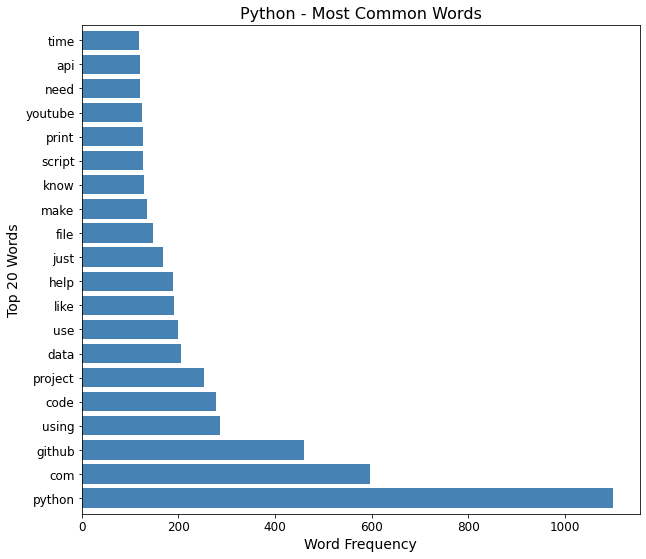

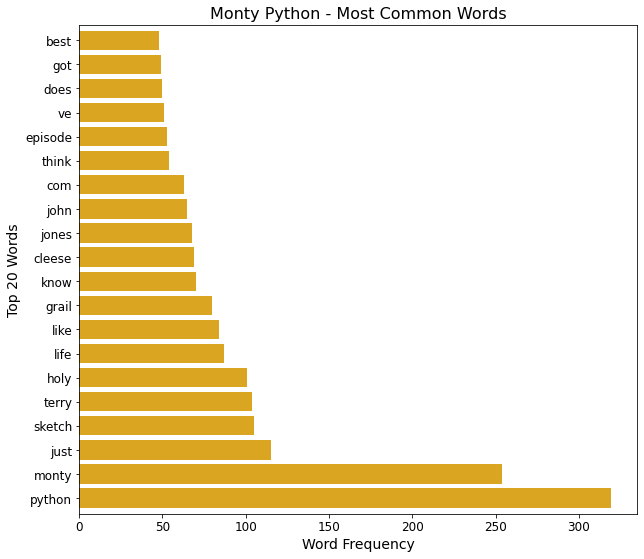

In [305]:
# Look at barchart of 25 most common words for each Subreddit:

py = plt.figure(figsize=(10,9))
python.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='steelblue', width=.8)
plt.title('Python - Most Common Words', fontsize=16)
plt.xlabel('Word Frequency', fontsize=14)
plt.ylabel('Top 20 Words', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

mp = plt.figure(figsize=(10,9))
montypy.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='goldenrod', width=.8);
plt.title('Monty Python - Most Common Words', fontsize=16)
plt.xlabel('Word Frequency', fontsize=14)
plt.ylabel('Top 20 Words', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

py.savefig("./images/topwords_python.png", bbox_inches='tight')
mp.savefig("./images/topwords_monty.png", bbox_inches='tight')

#### Post Length by Word Count
Only three words are common to the top 20 lists for each subreddit. 

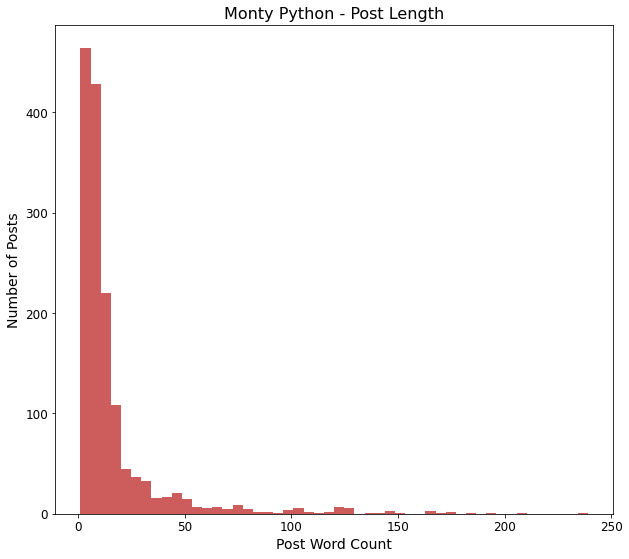

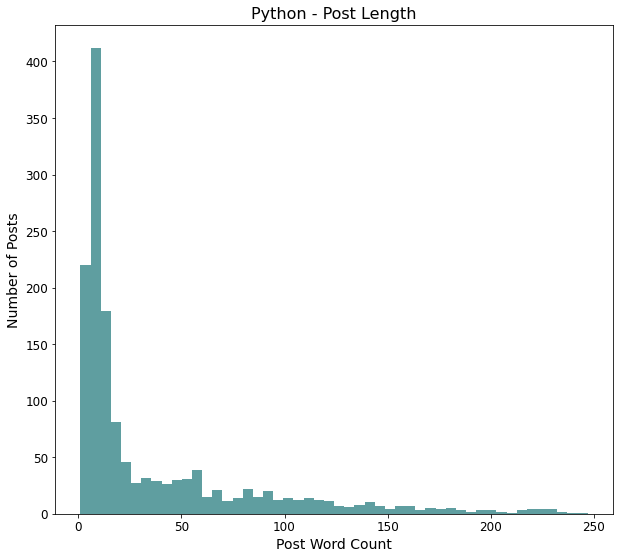

In [306]:


mp_posts = monty[monty['post_length'] < 250]
py_posts = pypro[pypro['post_length'] < 250]

monty_posts = plt.figure(figsize=(10, 9)) 
plt.hist(mp_posts['post_length'], bins=50, color='indianred')
plt.title('Monty Python - Post Length', fontsize=16)
plt.xlabel('Post Word Count', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

python_posts = plt.figure(figsize=(10, 9)) 
plt.hist(py_posts['post_length'], bins=50, color='cadetblue')
plt.title('Python - Post Length', fontsize=16)
plt.xlabel('Post Word Count', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

python_posts.savefig("./images/postlen_python.png", bbox_inches='tight')
monty_posts.savefig("./images/postlen_monty.png", bbox_inches='tight')

In [286]:
# Get some stats about reddit posts to add to charts:
py_post_length = [len(tokens) for tokens in pypro['tokens']]

print(f'Avg Post Length: {np.mean(py_post_length).round(1)}')
print(f'Min Post Length: {np.min(py_post_length).round(1)}')
print(f'Max Post Length: {np.max(py_post_length).round(1)}')

Avg Post Length: 49.6
Min Post Length: 1
Max Post Length: 1255


In [282]:
mp_post_length = [len(tokens) for tokens in monty['tokens']]

print(f'Avg Post Length: {np.mean(mp_post_length).round(1)}')
print(f'Min Post Length: {np.min(mp_post_length).round(1)}')
print(f'Max Post Length: {np.max(mp_post_length).round(1)}')

Avg Post Length: 17.7
Min Post Length: 1
Max Post Length: 611


In [190]:
# Exporting cvs (remembering to drop index this time) to use for modeling:
all_py.to_csv('./data/all_py_2.csv', index=False)